# EDA

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("../data/geo-reviews-dataset-2023.csv")

## Basic info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   address  500000 non-null  object 
 1   name_ru  499030 non-null  object 
 2   rating   500000 non-null  float64
 3   rubrics  500000 non-null  object 
 4   text     500000 non-null  object 
dtypes: float64(1), object(4)
memory usage: 19.1+ MB


In [4]:
# В датасете присутствуют null-названия мест
df.isnull().sum()

address      0
name_ru    970
rating       0
rubrics      0
text         0
dtype: int64

In [5]:
df[df["name_ru"].isnull()]

,address,name_ru,rating,rubrics,text
322,"Москва, 8-я улица Соколиной Горы, 15А, стр. 23",NaN,5.0,Офис организации,"Ребята профи!\n\nОтлично подобрали модель, съе..."
5716,"Челябинская область, Златоуст, Таганайская ули...",NaN,5.0,Гостиница,"Гостиница действительно хорошая, удобно распол..."
5717,"Челябинская область, Златоуст, Таганайская ули...",NaN,5.0,Гостиница,Был здесь на кулинарном мастер-классе. Место а...
5718,"Челябинская область, Златоуст, Таганайская ули...",NaN,5.0,Гостиница,"Тихое место, в выходные возможно и шумно так к..."
5719,"Челябинская область, Златоуст, Таганайская ули...",NaN,5.0,Гостиница,"Воспитанные и отзывчивые официанты , вкусная к..."
...,...,...,...,...,...
498536,"Республика Башкортостан, Уфа, улица Менделеева...",NaN,5.0,"Скалодром;Спортивный клуб, секция",Были с детьми на 8 марта. Приехали специально ...
498688,"Москва, Юго-Восточный административный округ, ...",NaN,5.0,Изготовление памятников и надгробий;Изделия из...,"Отличное качество материала, прекрасное исполн..."
498913,"Самарская область, Волжский район, жилой район...",NaN,1.0,Магазин цветов;Копировальный центр;Товары для ...,"Цен на цветы которые находятся на витрине нет,..."
499006,"Волгоград, улица Гроссмана, 6",NaN,5.0,Салон красоты,Квалифицированные мастера. Работу выполняют с ...


In [6]:
df.describe(include="all")

,address,name_ru,rating,rubrics,text
count,500000,499030,500000.00000,500000,500000
unique,191925,148456,NaN,31793,499885
top,"Москва, Ходынский бульвар, 4",Пятёрочка,NaN,Гостиница,Хороший магазин\n
freq,340,6030,NaN,42242,10
mean,NaN,NaN,4.48160,NaN,NaN
std,NaN,NaN,1.14625,NaN,NaN
min,NaN,NaN,0.00000,NaN,NaN
25%,NaN,NaN,5.00000,NaN,NaN
50%,NaN,NaN,5.00000,NaN,NaN
75%,NaN,NaN,5.00000,NaN,NaN


## Распределение рейтинга

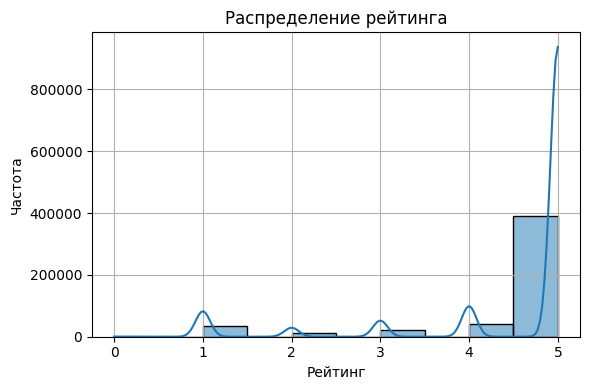

In [7]:
plt.figure(figsize=(6, 4))
sns.histplot(df["rating"].dropna(), bins=10, kde=True)
plt.title("Распределение рейтинга")
plt.xlabel("Рейтинг")
plt.ylabel("Частота")
plt.grid(True)
plt.tight_layout()
plt.show()

## Распределение рубрик

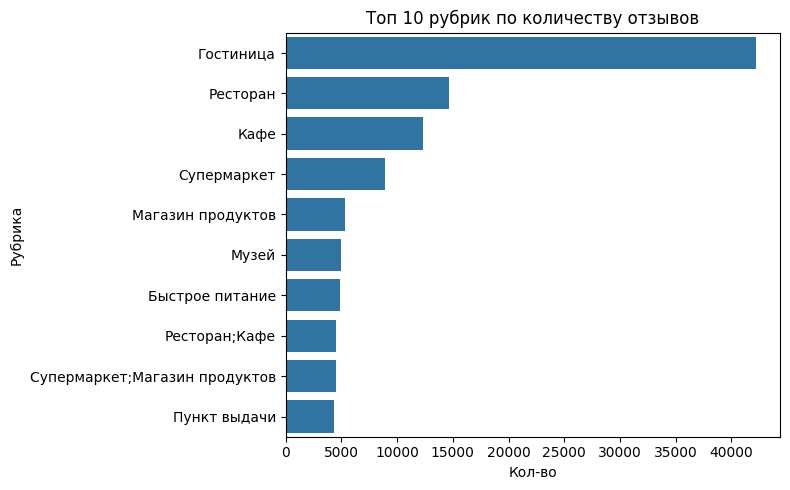

In [8]:
top_n = 10
top_rubrics = df["rubrics"].value_counts().nlargest(top_n).index

plt.figure(figsize=(8, 5))
sns.countplot(y="rubrics", data=df[df["rubrics"].isin(top_rubrics)], order=top_rubrics)
plt.title(f"Топ {top_n} рубрик по количеству отзывов")
plt.xlabel("Кол-во")
plt.ylabel("Рубрика")
plt.tight_layout()
plt.show()

## Анализ отзывов

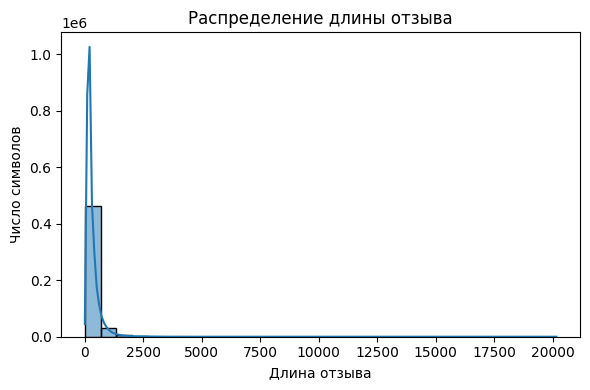

In [9]:
df["text_length"] = df["text"].astype(str).apply(len)

plt.figure(figsize=(6, 4))
sns.histplot(df["text_length"], bins=30, kde=True)
plt.title("Распределение длины отзыва")
plt.xlabel("Длина отзыва")
plt.ylabel("Число символов")
plt.tight_layout()
plt.show()

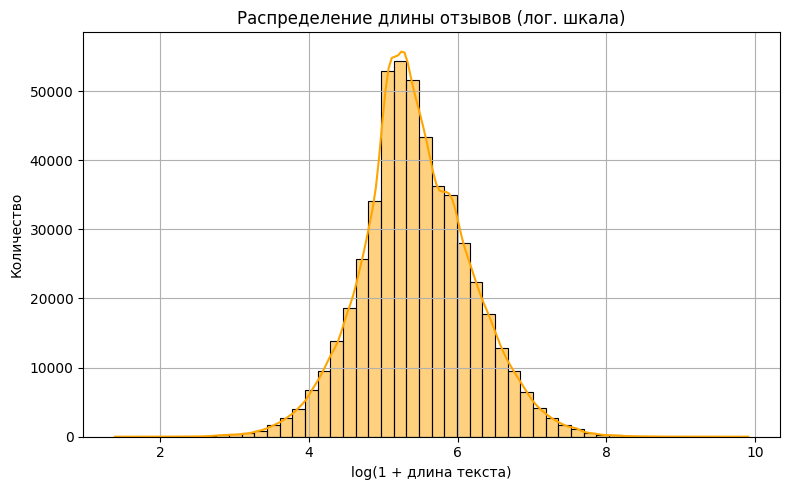

In [10]:
# Более подробно

plt.figure(figsize=(8, 5))
sns.histplot(np.log1p(df["text_length"]), bins=50, kde=True, color="orange")
plt.title("Распределение длины отзывов (лог. шкала)")
plt.xlabel("log(1 + длина текста)")
plt.ylabel("Количество")
plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:
print("Средняя длина отзыва в символах:", int(df["text_length"].mean()))

Средняя длина отзыва в символах: 304


### WordCloud

Не будем учитывать стоп-слова

In [12]:
import nltk

nltk.download("stopwords")
nltk.download("punkt_tab")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ksusonic/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/ksusonic/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

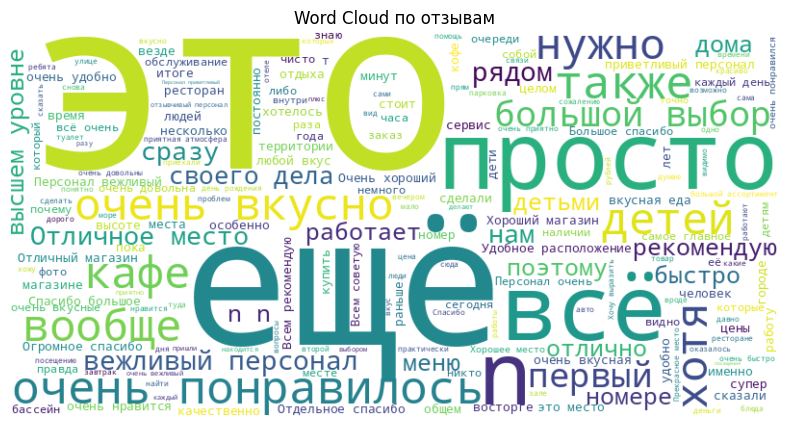

In [19]:
from wordcloud import WordCloud
from nltk.corpus import stopwords


stop_words = set(stopwords.words("russian"))

wordcloud = WordCloud(
    width=800, height=400, background_color="white", stopwords=stop_words
).generate(" ".join(df["text"].astype(str).dropna()))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud по отзывам")
plt.show()

### Sentiment analysis

In [2]:
import torch

device = "cuda:0" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [14]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.nn.functional import softmax


tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")
model = AutoModelForSequenceClassification.from_pretrained(
    "cardiffnlp/twitter-roberta-base-sentiment"
).to(device)

labels = ["Негативный", "Нейтральный", "Позитивный"]


def analyze_sentiment(text):
    if not isinstance(text, str) or text.strip() == "":
        return "", 0.0

    text = text[:304]  # ограничиваем длину средним отзывом

    encoded_input = tokenizer(
        text, return_tensors="pt", truncation=True, padding=True, max_length=512
    ).to(device)

    with torch.no_grad():
        output = model(**encoded_input)
        probs = softmax(output.logits, dim=1).cpu().numpy()[0]
        sentiment_idx = probs.argmax()
        sentiment_label = labels[sentiment_idx]
        confidence = round(float(probs[sentiment_idx]), 3)

    return sentiment_label, confidence

In [15]:
from tqdm import tqdm

tqdm.pandas()

df[["sentiment", "sentiment_confidence"]] = df["text"].progress_apply(
    lambda x: pd.Series(analyze_sentiment(x))
)

  0%|          | 290/500000 [00:22<10:58:41, 12.64it/s]


KeyboardInterrupt: 